### Algorithm 1: Logistic Regression

Logistic regression is a binary classification algorithm by simply finding a best fitted line that separates two dataset.  In order to squash the output to a value between 0 and 1, logistic regression used a function called logit function (or sigmoid function)

Steps are the followings:
    
1. Prepare your data
    - add intercept
    - X and y and w in the right shape
        - X (m, n)
        - y (m,  )
        - w (n,  )
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the cross entropy defined as
    $$J = - \Sigma_{i=1}^m y^{(i)}log(h) + (1-y^{(i)})log(1-h)$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\theta^Tx}}$$
3. Calculate the gradient based on the loss
    - The gradient of $\theta_j$ is defined as
        $$\frac{\partial J}{\partial \theta_j} = \Sigma_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This can be derived by knowing that 
        $$J= y_1 log h + (1 - y_1) lg (1-h)$$
        $$h = \frac{1}{1+e^{-g}}$$
        $$g = \theta^Tx$$
    - Thus, gradient of $J$ in respect to some $\theta_j$ is
        $$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$
      where
        $$\frac{\partial J}{\partial h} = \frac{y_1 - h}{h(1-h)}$$
        $$\frac{\partial h}{\partial g} = h(1-h)$$
        $$\frac{\partial g}{\partial \theta_j} = x_j$$
    - Thus, 
    $$
    \begin{align}
    \frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
   &= \frac{y_1 - h}{h(1-h)} * h(1-h) * x_j\\
   &= (y_1 - h)x_j\\
   \end{align}
   $$
    - We can then put negative sign in front to make it negative loglikelihood, thus
       $$(h - y_i)x_j$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Step 1: Prepare your data

#### 1.1 Get your X and y in the right shape

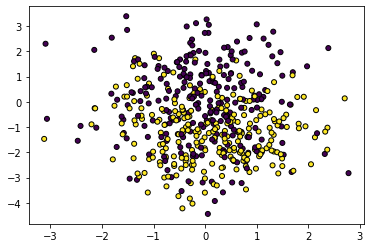

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Feature scale your data to reach faster convergence

In [2]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Add intercepts

In [4]:
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [5]:
# Your code here

import numpy as np
from sklearn.metrics import average_precision_score, classification_report

#here I use mini-batch as a demonstration
#you are free to use any variants of gradient descent
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = -(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))) / m
    grad = (1/m) * np.dot(X.T, error)
    return cost, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter=5000)

Cost at iteration 0 0.6931471805599452
Cost at iteration 500 0.4627260953119901
Cost at iteration 1000 0.33803917449875315
Cost at iteration 1500 0.3508516799407877
Cost at iteration 2000 0.4995640253036018
Cost at iteration 2500 0.4236396430334013
Cost at iteration 3000 0.3118707771596039
Cost at iteration 3500 0.402219737717822
Cost at iteration 4000 0.365791827297527
Cost at iteration 4500 0.3338703442590838


#### 2. Compute accuracy

In [6]:
yhat = output(h_theta(X_test, w))

print("APS: ", average_precision_score(y_test, yhat))
print("Report: ", classification_report(y_test, yhat))

APS:  0.7496435566000783
Report:                precision    recall  f1-score   support

           0       0.79      0.84      0.82        76
           1       0.83      0.77      0.80        74

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



### Algorithm 2: Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

Steps are the followings:
    
The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - X and y in the right shape
        - X (m, n)
        - y (m, k)
        - w (n, k)
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the cross entropy defined as
    $$-\Sigma_{i=1}^m y^{(i)}log(h)$$
    where h is defined as the softmax function as
    $$ p(y=j \mid \theta^{(i)}) = \frac{e^{\theta^{(i)}}}{\Sigma_{j=1}^{k} e^{\theta_k^{(i)}}}$$
3. Calculate the gradient based on the loss
    - The gradient is defined as
       $$\frac{\partial J}{\partial \theta_j} = \Sigma_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This gradient can be derived from the following simple examples:
        - Suppose given 2 classes (k = 2) and 3 features (n = 3), we have the loss function as
       $$ J = -y_1 log h_1 - y_2 log h_2 $$
       where $h_1$ and $h_2$ are
       $$ h_1 = \frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)} $$
       $$ h_2 = \frac{\exp(g_2)}{\exp(g_1)+\exp(g_2)} $$
       where $g_1$ and $g_2$ are
       $$ g_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 $$
       $$ g_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3  $$
    - For example, to find the gradient of $J$ in respect to $w_{21}$, we simply can use the chain rule (or backpropagation) to calculate like this:
       $$ \frac{\partial J}{\partial w_{21}} = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}$$
   - If we know each of them, it is easy, where
       $$\frac{\partial J}{\partial h_{1}} = -\frac{y_1}{h_1}$$
       $$\frac{\partial J}{\partial h_{2}} = -\frac{y_2}{h_2}$$
       $$\frac{\partial h_{1}}{\partial g_{1}} = \frac{\exp(g_{1})}{\exp(g_{1}) + \exp(g_{2})} - (\frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)})^2 = h_1 (1 - h_1)$$
       $$\frac{\partial h_{2}}{\partial g_{1}} = \frac{-exp(g_2)exp(g_1)}{(\exp(g_1) + \exp(g_2)^2} = -h_2h_1$$
       $$\frac{\partial g_1}{\partial w_{21}} = x_2$$
    - For those who forgets how to do third and fourth, recall that the quotient rule
        $$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$
    - Putting everything together, we got
    $$
    \begin{align}
    \frac{\partial J}{\partial w_{21}} & = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}\\
   &= -\frac{y_1}{h_1} * h_1 (1 - h_1) * x_2 + -\frac{y_2}{h_2} * -h_2h_1 * x_2 \\
   &= x_2 (-y_1 + y_1h_1 + y_2h_1)\\
   &= x_2 (-y_1 + h_1(y_1 + y_2))\\
   &= x_2 (h_1 - y_1)\\
   \end{align}
   $$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

#make sure our y is in the shape of (n, k)
#we will convert our output vector in 
#matrix where no of columns is equal to the no of classes. 
#The values in the matrix will be 0 or 1. For instance the rows 
#where we have output 2 the column 2 will contain 1 and rest all 0.
#in simple words, y will be of shape (m, k)
k = len(set(y))  #no. of class  (can also use np.unique)
m = X_train.shape[0]  #no.of samples
n = X_train.shape[1]  #no. of features
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    y_train_encoded[np.where(cond), each_class] = 1

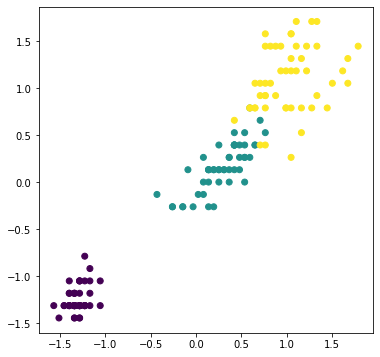

In [8]:
#Step 1.1 (optional): Visualize our data

#your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [9]:
#Step 2: Fit your data

import numpy as np
from sklearn.metrics import average_precision_score, classification_report
from sklearn.preprocessing import StandardScaler

def logistic_regression_GD(X, y, k, n, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    w = np.random.rand(n, k)
    l_rate = 0.01
    for i in range(max_iter):
        cost, grad =  gradient(X, y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

#for those who tend to feel overwhelmed with lots of code
#I recommend you to write each part of the code separately as function
#it helps!
def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    cost = -np.sum(y*np.log(h))/m
    error = h - y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, w):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
#     print("X@w: ", (X @ w)[:5])
#     print("Softmax: ", softmax(X @ w)[:5])
    return softmax(X @ w)

w, i = logistic_regression_GD(X_train, y_train_encoded, k, X_train.shape[1], max_iter=5000)

pred = np.argmax(h_theta(X_test, w), axis=1)

print("Report: ", classification_report(y_test, pred))

Cost at iteration 0 1.3413407891175286
Cost at iteration 500 0.07233678598235581
Cost at iteration 1000 0.06293937778455688
Cost at iteration 1500 0.05938530006971258
Cost at iteration 2000 0.05750743920133701
Cost at iteration 2500 0.056360032482542635
Cost at iteration 3000 0.0555989191183518
Cost at iteration 3500 0.05506616237491778
Cost at iteration 4000 0.05467857825303502
Cost at iteration 4500 0.05438818321874115
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.85      0.92        13
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Algorithm 3: Logistic Regression with Newton Raphson method

Newton Raphson method is an alternative way to gradient descent in Logistic Regression.  Instead of simply looking at each step on the slope, we take a second derivative to find the curvature towards the derivatives = 0.  It is typically faster than normal gradient descent, but as the number of features grow, its performance can hurt due to matrix inverse and finding second derivatives.

Steps are the followings:
    
1. Prepare your data
    - add intercept
    - X and y and w in the right shape
        - X (m, n)
        - y (m,  )
        - w (n,  )
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the cross entropy defined as
    $$J = - \Sigma_{i=1}^m y^{(i)}log(h) + (1-y^{(i)})log(1-h)$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\theta^Tx}}$$
3. Calculate the direction based on the curvature of $\theta_j$ defined as
    $$curv(\theta_j) = H^{-1}(\theta_j) \nabla f(\theta_j) $$
    where $H^{-1}(\theta_j)$ of $f$ is a matrix of size (n, n) of second derivatives in which $H_{ij} = \frac{\partial^2f}{\partial w_i \partial w_j}$  and $\nabla f$ is the gradient of f, its vector of size (n, ) of partial derivatives $[\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2},.... \frac{\partial f}{\partial w_p}]$
    - To make our program easy to implement, we can derive that 
        $$H = X^TSX$$
      where $S$ is a diagonal matrix of the first derivative
4. Update the theta with this update rule
    $$\theta_j := \theta_j - curv$$
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Step 1: Prepare your data

#### 1.1 Get your X and y in the right shape

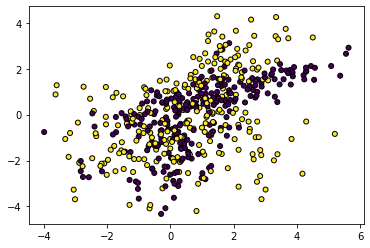

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=5, n_redundant=1, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Feature scale your data to reach faster convergence

In [11]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Add intercepts

In [13]:
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [14]:
# Your code here

import numpy as np
from sklearn.metrics import average_precision_score, classification_report

#here I use mini-batch as a demonstration
#you are free to use any variants of gradient descent
def newton(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, second, first = newton_curve(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        H_inverse = np.linalg.pinv(second)
        w = w - l_rate * H_inverse @ first
    return w, i

def newton_curve(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = -(np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))) / m
    first = (1/m) * np.dot(X.T, error)
    second = X.T @ np.diag((h) * (1-h)) @ X
    return cost, second, first

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = newton(X_train, y_train, max_iter=5000)

Cost at iteration 0 -0.6931471805599452
Cost at iteration 500 -0.635740651638479
Cost at iteration 1000 -0.5804968715558261
Cost at iteration 1500 -0.5788379043609644
Cost at iteration 2000 -0.5146774412504076
Cost at iteration 2500 -0.5019837341654637
Cost at iteration 3000 -0.6386434611248317
Cost at iteration 3500 -0.4298097143150693
Cost at iteration 4000 -0.4749497078705276
Cost at iteration 4500 -0.39479872061329957


#### 2. Compute accuracy

In [15]:
yhat = output(h_theta(X_test, w))

print("APS: ", average_precision_score(y_test, yhat))
print("Report: ", classification_report(y_test, yhat))

APS:  0.7686485204293424
Report:                precision    recall  f1-score   support

           0       0.79      0.84      0.81        73
           1       0.84      0.79      0.81        77

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150

